In [1]:
from diffusers import DDIMScheduler

d:\TextImageDiffussion\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
max_steps = 100

In [42]:
noise_scheduler = DDIMScheduler(
    num_train_timesteps=max_steps,
    beta_start=0.0001,
    beta_end=0.02
)

In [4]:
import torch
from PIL import Image
from torchvision import transforms

In [5]:
def load_img(path:str):
   image = Image.open(path)
   return image


In [6]:
transform = transforms.ToTensor()
image_tensor = transform(load_img(r"C:\Users\ASUS\Pictures\portrait-male-fashion-model-posing-hands-pocket-42029999.webp"))
print(image_tensor)

tensor([[[0.5059, 0.5059, 0.5059,  ..., 0.8824, 0.8784, 0.8784],
         [0.5059, 0.5059, 0.5059,  ..., 0.8824, 0.8784, 0.8784],
         [0.5059, 0.5059, 0.5059,  ..., 0.8824, 0.8784, 0.8784],
         ...,
         [0.6000, 0.6000, 0.6000,  ..., 0.9490, 0.9490, 0.9490],
         [0.6000, 0.6000, 0.6000,  ..., 0.9451, 0.9451, 0.9451],
         [0.6000, 0.6000, 0.6000,  ..., 0.9451, 0.9451, 0.9451]],

        [[0.5176, 0.5176, 0.5176,  ..., 0.8902, 0.8902, 0.8902],
         [0.5176, 0.5176, 0.5176,  ..., 0.8902, 0.8902, 0.8902],
         [0.5176, 0.5176, 0.5176,  ..., 0.8902, 0.8902, 0.8902],
         ...,
         [0.6000, 0.6000, 0.6000,  ..., 0.9529, 0.9529, 0.9529],
         [0.6000, 0.6000, 0.6000,  ..., 0.9490, 0.9490, 0.9490],
         [0.6000, 0.6000, 0.6000,  ..., 0.9490, 0.9490, 0.9490]],

        [[0.5020, 0.5020, 0.5020,  ..., 0.8980, 0.8863, 0.8863],
         [0.5020, 0.5020, 0.5020,  ..., 0.8980, 0.8863, 0.8863],
         [0.5020, 0.5020, 0.5020,  ..., 0.8980, 0.8863, 0.

In [43]:
noisy_images = []
noise = torch.rand(image_tensor.shape)
for i in range(1,max_steps):
  timesteps = torch.tensor([i])
  noisy_image = noise_scheduler.add_noise(image_tensor,noise=noise,timesteps=timesteps).numpy()
  noisy_image_transposed = noisy_image.transpose(1, 2, 0)
  noisy_images.append(noisy_image_transposed)


In [11]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1.9138144e-05..1.0198208].


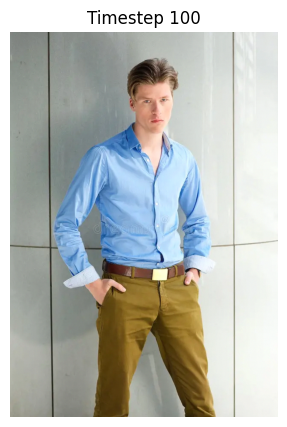

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0007624769..1.4006244].


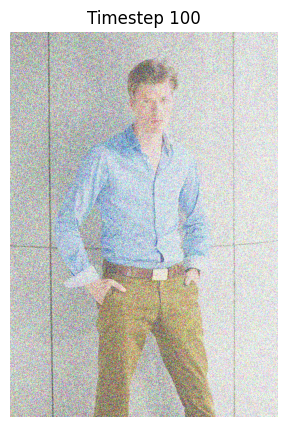

In [44]:
# for i in range(len(noisy_images)):
plt.figure(figsize=(5,5))
plt.imshow(noisy_images[0])
plt.title(f"Timestep {i+1}")
plt.axis("off")
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(noisy_images[98])
plt.title(f"Timestep {i+1}")
plt.axis("off")
plt.show()